# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

### Откройте файл с данными и изучите общую информацию. 

In [1]:
# Импортируем библиотеки, которые могут нам понадобиться
import pandas as pd
import matplotlib.pyplot as plt 

In [2]:
# Открываем данные и получаем основную информацию о них
data = pd.read_csv('/datasets/real_estate_data.csv', sep = '\t')
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'cityCenters_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], d

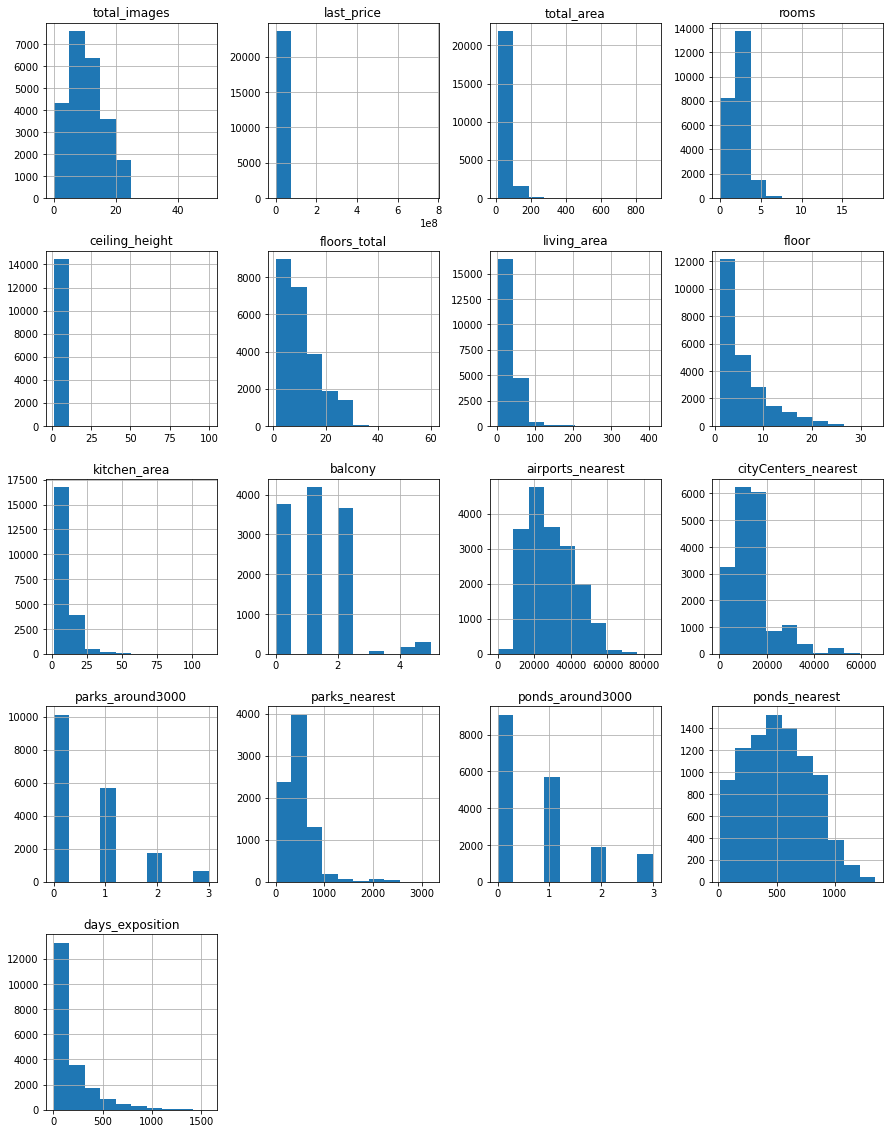

In [4]:
# Построим гистограммы для всех столбцов
data.hist(figsize=(15, 20))

**Вывод**

В датасете у нас более 20000 значений, но они требуют первичной обработки:
- у нас много пропусков, которые требуют внимания
- есть аномальные значения в столбцах
- необходимо привести некоторые столбцы к другом формату

### Предобработка данных

**Работа с пропусками**

Найдите и изучите пропущенные значения в столбцах:
 
Определите, в каких столбцах есть пропуски.
Заполните пропущенные значения там, где это возможно. Например, если продавец не указал число балконов, то, скорее всего, в его 
квартире их нет. Такие пропуски правильно заменить на 0. Если логичную замену предложить невозможно, то оставьте эти значения пустыми. 
Пропуски — тоже важный сигнал, который нужно учитывать.
В ячейке с типом markdown укажите причины, которые могли привести к пропускам в данных.

In [5]:
# Подсчитаем количество пропусков в разных столбцах
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

У нас довольно много пропусков, большая часть их именно в картографических данных. По возможности будем от них избавляться.

In [6]:
# Для начала поработаем с колонкой is_apartment. Если ничего не указано, скорее всего это не апартаменты и можно попробовать в 
# вставить аргумент false

data['is_apartment'] = data['is_apartment'].fillna(False)
data['is_apartment'].isna().sum()

0

In [7]:
# Если в данных не указано количество балконов, скорее всего их нет. В данном случае заменим пропуски на 0
data['balcony'] = data['balcony'].fillna(0)
data['balcony'].isna().sum()

0

In [8]:
# В данных очень много пропусков в зачении высоты потолка (примерно 40% данных). Можно попробовать заполнить пропуски в этом столбце
# медианным значением, но в дальнейшем исследовании надо иметь это в виду
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].mean())
data['ceiling_height'].isna().sum()

0

In [9]:
# Также в около 10% данных пропуски в значениях жилой площади. Это не так много, можно попробовать заполнить их средними значениями
# в зависимости от количества комнат в квартире.

for count_of_rooms in data['rooms'].unique():
    data.loc[(data['rooms'] == count_of_rooms) & (data['living_area'].isna()), 'living_area'] = \
    data.loc[(data['rooms'] == count_of_rooms), 'living_area'].mean()
# Проверяем заполнились ли пропуски
print(data['living_area'].isna().sum())

0


In [10]:
#Также заполним средними значениями площадь кухни (пропуски в этом столбце также составляют около 10% данных)
#data['kitchen_area'] = data['kitchen_area'].fillna(data['kitchen_area'].mean())
#data['kitchen_area'].isna().sum()


In [11]:
# Избавимся от строк, где отсутствует значение floors_total. Их всего 86 штук, но без них мы не сможем понять, на последнем ли 
# этаже находится квартира

data = data.dropna(subset=['floors_total']) 
data['floors_total'].isna().sum()

0

In [12]:
# Заполним пустые значения в колонке locality_name значением "неизвестно"
data['locality_name'] = data['locality_name'].fillna('Неизвестно')
data['locality_name'].isna().sum()

0

In [13]:
# В дальнейшем нам понадобятся данные для расчета расстояния до центра города. Это можно сделать только в том случае, если у нас 
# имя населенного пункта Санкт-Петербург. Поэтому если мы увидим пропуски в столбце расстония до центра в Санкт-Петербурге, нам 
# лучше от них избавиться. Сначала посчитаем их количество
data[(data['locality_name'] == 'Санкт-Петербург') & (data['cityCenters_nearest'].isna() == True)].shape

(60, 22)

In [14]:
# у нас 60 таких строк, надо их удалить
# сначала находим индексы таких строк, а затем удаляем их
index = data.index[(data['locality_name'] == 'Санкт-Петербург') & (data['cityCenters_nearest'].isna() == True)].tolist()
data = data.drop(index = index)

In [15]:
data[(data['locality_name'] == 'Санкт-Петербург') & (data['cityCenters_nearest'].isna() == True)].shape

(0, 22)

In [16]:
# Пропусков в этом столбце довольно много, их нужно либо удалить, либо заполнить средними. Так как в дальнейшем мы будем исследовать
# эту переменную подробнее, лучше удалить пропуски в этом столбце. Всего их с учетом прошлых удалений осталось около 3000

data[data['days_exposition'].isna() == True]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.700000,16.0,51.000000,8,False,...,25.00,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,2.771499,24.0,31.736849,22,False,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
44,13,5350000.0,40.00,2018-11-18T00:00:00,1,2.771499,22.0,17.893552,3,False,...,NaN,1.0,Санкт-Петербург,30471.0,11603.0,1.0,620.0,1.0,1152.0,NaN
45,17,5200000.0,50.60,2018-12-02T00:00:00,2,2.650000,9.0,30.300000,7,False,...,7.00,0.0,Санкт-Петербург,30011.0,12872.0,0.0,NaN,0.0,NaN,NaN
46,17,6600000.0,52.10,2019-01-31T00:00:00,2,2.600000,24.0,29.700000,9,False,...,8.30,2.0,Санкт-Петербург,15114.0,12702.0,0.0,NaN,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23684,20,21400000.0,145.00,2018-11-02T00:00:00,4,3.000000,26.0,71.400000,17,False,...,15.60,0.0,Санкт-Петербург,11827.0,11459.0,0.0,NaN,0.0,NaN,NaN
23685,15,2490000.0,31.00,2019-01-24T00:00:00,1,2.500000,5.0,17.300000,5,False,...,5.60,1.0,Ломоносов,48393.0,51818.0,0.0,NaN,0.0,NaN,NaN
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.700000,5.0,73.300000,3,False,...,13.83,0.0,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,2.771499,3.0,29.700000,1,False,...,NaN,0.0,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
#data = data[data['days_exposition'].isna() == False]
#data[data['days_exposition'].isna() == True]

**Вывод по пропускам**

Мы заполнили большинство пропусков, кроме пропусков в картографиечкских данных. Если бы у нас было очень много данных, мы могли бы попробовать сгруппировать их по улице и району, чтобы заполнить их. Но в данном случае это не имеет большого смысла, поэтому заполнять их не станем.

Проблемы в картографических данных связаны, скорее всего, с техническими неполадками или банальной невозможностью рассчитать некоторые данные (например, вполне может быть что рассчитать расстояние до центра города проще, чем для далеких от Санкт-Петербурга сел). Но даже в данных с Питерских квартир пропуски были - это, вероятнее всего, ошибка.

Пропуски в данных, связанных с апартаментами или балконами может быть связано с тем, что они не заполнялись вручную при выставлении квартиру на продажу.

Пропуски в данных с количеством дней продаж также могут возникнуть по разным причинам: возможно, пользователь снял объявление с сайта, если это данные новые, то квартира может еще не успела продаться. 

Остальные данные (по типу количества этажей в квартире или площади кухни) могли не указываться из-за банального незнания пользователем, но возможно имеет место быть и техническая ошибка. Но пропусков в таких столбцах не так много, и они составляют малую часть от всего набора данных.

**Работа с типами данных**

Рассмотрите типы данных в каждом столбце:
 
Найдите столбцы, в которых нужно изменить тип данных.
Преобразуйте тип данных в выбранных столбцах.
В ячейке с типом markdown поясните, почему нужно изменить тип данных.

In [18]:
# После того, как мы заполнили пропуски в столбике is_apartment, его значения стали булевыми. Поэтому этот столбец не требует 
# преобразования

data.is_apartment.dtype

dtype('bool')

In [19]:
# Теперь нам стоит заменить тип данных в столбце first_day_exposition на datetime
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format = '%Y-%m-%dT%H:%M:%S')

In [20]:
# Изменим тип данных столба floors_total с float на int
data['floors_total'] = data['floors_total'].astype('int')
data.floors_total.dtype

dtype('int64')

In [21]:
# В столбце с ценой значения слишком большие, оперировать ими может быть неудобно. Разделим столбец на миллион
data['last_price'] = data['last_price'] / 1000000
# В дальнейшем будем иметь в виду, что цена записана в миллионах
data['last_price'].head()

0    13.000
1     3.350
2     5.196
3    64.900
4    10.000
Name: last_price, dtype: float64

**Вывод по типам данных**

Мы изменили тип данных с датой выкладки квартиры на продажу на datetime, чтобы в дальнейшем было легко извлечь день недели, месяц и так далее

Также заменили в столбце значение на int столбец с количеством этажей (количество этажей не может быть нецелым числом), разделили цену на миллион для удобства подсчетов

**Удаление неявных дубликатов**

Изучите уникальные значения в столбце с названиями и устраните неявные дубликаты. Например, «поселок Рябово» и «поселок городского типа 
Рябово», «поселок Тельмана» и «посёлок Тельмана» — это обозначения одних и тех же населённых пунктов. Вы можете заменить названия в 
существующем столбце или создать новый с названиями без дубликатов.

In [22]:
# Изучим уникальные значения в столбце с населенным пунктом
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [23]:
# Количество уникальных значений в столбце
data['locality_name'].nunique()

365

In [24]:
# Для начала заменим все буквы ё на е
data['locality_name'] = data['locality_name'].str.replace('ё', 'е')
print(data['locality_name'].nunique())
# Количество значений уменьшилось

331


In [25]:
# у нас все равно остались неявные дубликаты, поэтому стоит избавиться от всех наименований по типу "поселок", "деревня" и так далее
list_for_replace = ['поселок городского типа ', 'городской поселок ', 'поселок ', 'садовое товарищество ' , 'деревня ', 'станции ', 'село ', 'садоводческое некоммерческое товарищество ']
for i in list_for_replace:
    data['locality_name'] = data['locality_name'].str.replace(i, '')
data['locality_name'].nunique()
# количество значений уменьшилось до 281

309

**Удаление выбивающихся значений**

Найдите и устраните редкие и выбивающиеся значения. Например, в столбце ceiling_height может быть указана высота потолков 25 м и 32 м. Логично предположить, что на самом деле это вещественные значения: 2.5 м и 3.2 м. Попробуйте обработать аномалии в этом и других столбцах.
 
Если природа аномалии понятна и данные действительно искажены, то восстановите корректное значение.
В противном случае удалите редкие и выбивающиеся значения.
В ячейке с типом markdown опишите, какие особенности в данных вы обнаружили.

Text(0.5, 0, 'Высота потолка')

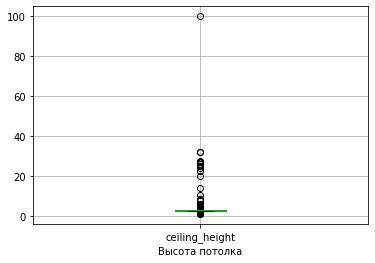

In [29]:
# Для начала изучим данные с высотой потолка
data.boxplot(column = 'ceiling_height')
# У нас довольно много аномальных значенийplt.title('Распределение значений общей площади')
plt.xlabel('Высота потолка') 

In [30]:
# В некоторых строках data['ceiling_height'] указаны слишком бользие значения: например высота потолка 25 метров. Скорее всего, 
# допущена ошибка в разделении целого разряда и десятичного.
# Избавимся от подобного разделив все значения, которые больше 20 на 10
data['ceiling_height'] = data['ceiling_height'].apply(lambda x: x/10 if x > 20 else x)
data[data['ceiling_height'] > 20]['ceiling_height'].count()

0

Text(0, 0.5, 'Количество объявлений')

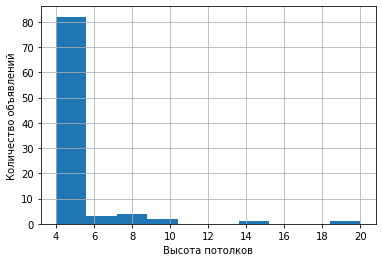

In [31]:
# Исходя из этой гистограммы у нас остались квартиры, где высота потолка достигает и 20 метров, но также делить эти значения на 10 
# нельзя, так как результат также будет нереальным. Можно попробовать заменить эти значения на среднее, но лучше их удалить, если их 
# не так много
data['ceiling_height'].hist(range = (4, 20))
plt.xlabel('Высота потолков') 
plt.ylabel('Количество объявлений')

In [32]:
data = data.query('ceiling_height < 20')

Теперь проверим выбросы с другой стороны в этом столбце:

Text(0, 0.5, 'Количество объявлений')

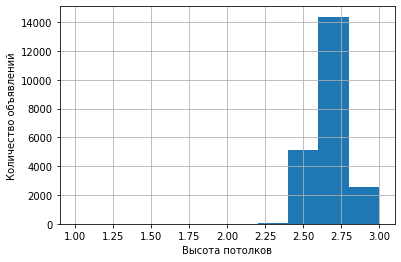

In [33]:
data['ceiling_height'].hist(range = (1, 3))
plt.xlabel('Высота потолков') 
plt.ylabel('Количество объявлений')

Нужно удалить все значения высоты потолков, которые меньше 2.5

In [34]:
data = data.query('ceiling_height >= 2.5')

In [35]:
# Изучим таблицу с описанием данных, чтобы найти нестандартно большие или маленькие значения
# больших значений (в данном случае, большие значения сильно завышают нам среднее)
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23477.000000,23477.000000,23477.000000,23477.000000,23477.000000,23477.000000,23477.000000,23477.000000,21268.000000,23477.000000,18036.000000,18059.000000,18060.000000,8017.000000,18060.000000,9038.000000,20351.000000
mean,9.877199,6.525634,60.303549,2.070665,2.746849,10.684074,34.440816,5.881373,10.563540,0.592111,28792.318363,14182.056648,0.610742,490.541849,0.770377,518.239544,181.027615
std,5.682575,10.874016,35.521188,1.077934,0.250137,6.600482,21.783591,4.878131,5.890667,0.958858,12626.259600,8614.255826,0.801927,341.779778,0.939405,277.924942,219.918496
min,0.000000,0.012190,12.000000,0.000000,2.500000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.420000,40.000000,1.000000,2.600000,5.000000,18.400000,2.000000,7.000000,0.000000,18576.000000,9231.000000,0.000000,288.000000,0.000000,293.250000,45.000000
50%,9.000000,4.650000,52.000000,2.000000,2.771499,9.000000,30.300000,4.000000,9.100000,0.000000,26732.500000,13092.000000,0.000000,454.000000,1.000000,503.000000,95.000000
75%,14.000000,6.790000,69.900000,3.000000,2.771499,16.000000,42.700000,8.000000,12.000000,1.000000,37250.000000,16285.000000,1.000000,612.000000,1.000000,730.000000,232.000000
max,50.000000,763.000000,900.000000,19.000000,14.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


Text(0.5, 0, 'Общая площадь')

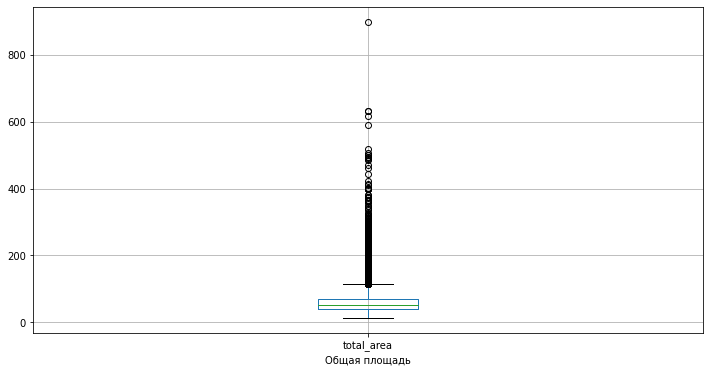

In [36]:
# Сначала рассмотрим столбец с площадью квартир. В этом столбце у нас довольно большое максимальное значение по сравнению с медианой
# Поэтому лучше избавиться от слишком больших значений
data.boxplot(column = 'total_area', figsize = (12, 6))
plt.xlabel('Общая площадь') 

Text(0, 0.5, 'Количество объявлений')

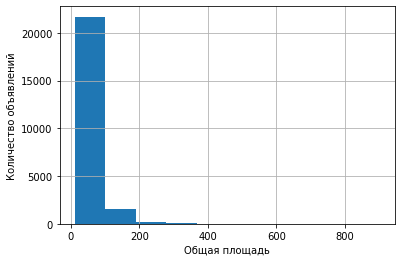

In [37]:
data['total_area'].hist()
# Судя по гистограмме, все значения, которые больше 300 встречаются гораздо реже, поэтому лучше их отсечь
plt.xlabel('Общая площадь') 
plt.ylabel('Количество объявлений')

In [38]:
# оставляем только значения где площадь меньше 300
data = data.query('total_area < 300')
data['total_area'].describe()

count    23416.000000
mean        59.405648
std         30.412199
min         12.000000
25%         40.000000
50%         52.000000
75%         69.400000
max        297.500000
Name: total_area, dtype: float64

In [39]:
# теперь изучим данные с ценой
data['last_price'].describe()

count    23416.000000
mean         6.289904
std          7.744528
min          0.012190
25%          3.400000
50%          4.600000
75%          6.750000
max        330.000000
Name: last_price, dtype: float64

Text(0.5, 0, 'Последняя цена, млн')

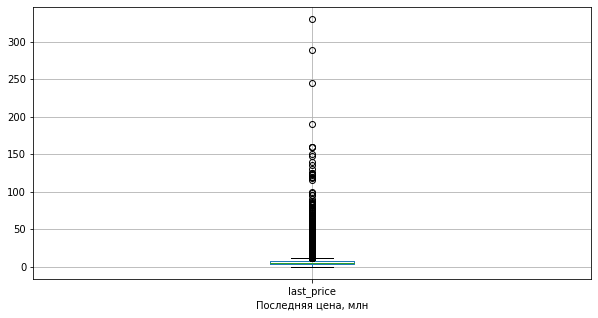

In [40]:
data.boxplot(column = 'last_price', figsize = (10,5))
plt.xlabel('Последняя цена, млн') 

Text(0, 0.5, 'Количество объявлений')

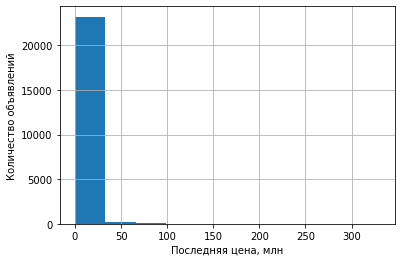

In [41]:
data['last_price'].hist()
plt.xlabel('Последняя цена, млн') 
plt.ylabel('Количество объявлений')

In [42]:
# Отбросим значения квартир, стоимость которых больше чем 60 млн
data = data.query('last_price < 60')

Text(0, 0.5, 'Количество объявлений')

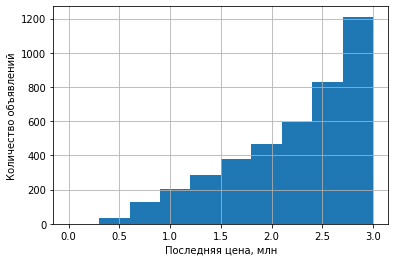

In [43]:
data['last_price'].hist(range = (0,3))
plt.xlabel('Последняя цена, млн') 
plt.ylabel('Количество объявлений')

In [44]:
data[data['last_price'] < 1]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
164,6,0.80,40.3,2018-06-25,2,2.771499,3,31.736849,1,False,...,NaN,2.0,Ефимовский,NaN,NaN,NaN,NaN,NaN,NaN,81.0
247,7,0.65,31.0,2017-01-20,1,2.771499,3,17.893552,1,False,...,NaN,0.0,Сланцы,NaN,NaN,NaN,NaN,NaN,NaN,378.0
259,6,0.90,30.0,2017-11-21,1,2.500000,5,15.000000,4,False,...,5.0,1.0,Ивангород,NaN,NaN,NaN,NaN,NaN,NaN,NaN
268,7,0.65,46.0,2018-03-15,2,2.500000,5,30.000000,5,False,...,7.0,0.0,Сланцы,NaN,NaN,NaN,NaN,NaN,NaN,75.0
293,2,0.90,42.8,2017-06-14,2,2.771499,5,32.000000,5,False,...,5.0,0.0,Сясьстрой,NaN,NaN,NaN,NaN,NaN,NaN,247.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23067,8,0.60,31.8,2019-04-24,1,2.771499,2,20.000000,1,False,...,7.0,0.0,Коркино,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23153,9,0.65,41.0,2017-10-13,2,2.771499,3,28.000000,1,False,...,6.0,0.0,Бокситогорск,NaN,NaN,NaN,NaN,NaN,NaN,14.0
23354,18,0.90,42.6,2018-02-26,2,2.771499,2,28.000000,1,False,...,9.0,0.0,Тихковицы,NaN,NaN,NaN,NaN,NaN,NaN,219.0
23484,11,0.47,44.5,2018-07-02,2,2.771499,2,28.000000,2,False,...,7.5,0.0,Сланцы,NaN,NaN,NaN,NaN,NaN,NaN,298.0


Стоит удалить также слишком низкие значения цены, а именно те, которые меньше миллиона

In [45]:
data = data[data['last_price'] >= 1]

Text(0.5, 0, 'Жилая площадь')

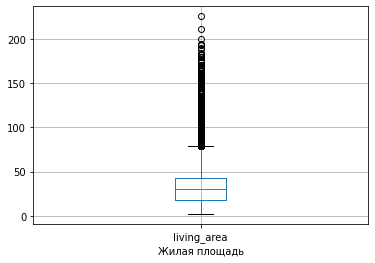

In [46]:
# Рассмотрим теперь данные с жилой площадью
data.boxplot(column = 'living_area')
plt.xlabel('Жилая площадь') 

Text(0, 0.5, 'Количество объявлений')

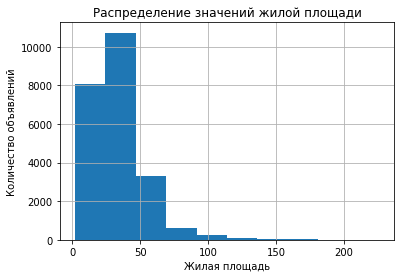

In [47]:
# Отбросим значения меньше 150
data['living_area'].hist()
data = data.query('living_area < 150')
plt.title('Распределение значений жилой площади')
plt.xlabel('Жилая площадь') 
plt.ylabel('Количество объявлений')

Теперь обработаем выбросы в значениях жилой площади с меньшей стороны. Минимальная жилая площадь на человека 6 кв. м., удалим значения, которые ниже

In [48]:
data = data.query('living_area >= 6')

Text(0.5, 0, 'Площадь кухни')

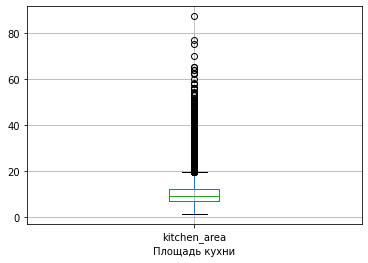

In [49]:
data.boxplot(column = 'kitchen_area')
plt.xlabel('Площадь кухни') 


Text(0, 0.5, 'Количество объявлений')

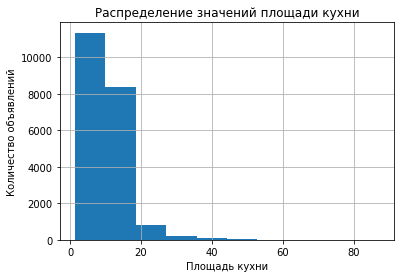

In [50]:
data['kitchen_area'].hist()
plt.title('Распределение значений площади кухни')
plt.xlabel('Площадь кухни') 
plt.ylabel('Количество объявлений')

In [51]:
data = data.query('kitchen_area < 40')

Text(0, 0.5, 'Количество объявлений')

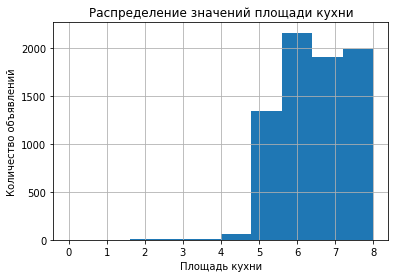

In [52]:
data['kitchen_area'].hist(range = (0, 8))
plt.title('Распределение значений площади кухни')
plt.xlabel('Площадь кухни') 
plt.ylabel('Количество объявлений')

In [53]:
data = data.query('kitchen_area >= 5')

Text(0.5, 0, 'Количество комнат')

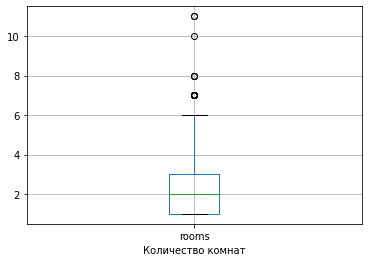

In [54]:
data.boxplot(column = 'rooms')

plt.xlabel('Количество комнат') 

Text(0, 0.5, 'Количество объявлений')

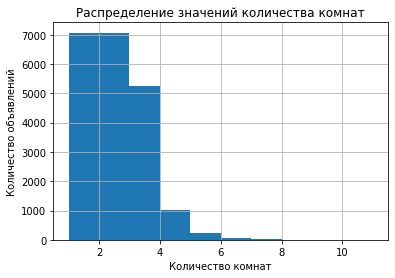

In [55]:
data['rooms'].hist()
plt.title('Распределение значений количества комнат')
plt.xlabel('Количество комнат') 
plt.ylabel('Количество объявлений')

In [56]:
data = data.query('rooms < 7')

Text(0.5, 0, 'Количетво дней продажи квартиры')

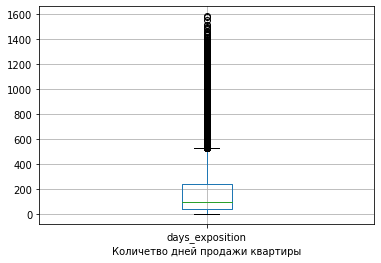

In [57]:
data.boxplot(column = 'days_exposition')
plt.xlabel('Количетво дней продажи квартиры') 

Text(0, 0.5, 'Количество объявлений')

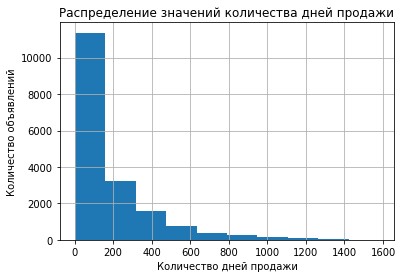

In [58]:
data['days_exposition'].hist()
plt.title('Распределение значений количества дней продажи')
plt.xlabel('Количество дней продажи') 
plt.ylabel('Количество объявлений')

In [59]:
data[data['floors_total'] > 35]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
397,15,5.990,54.0,2018-03-22,2,2.771499,36,21.4,28,False,...,18.7,1.0,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,11.0
2253,12,3.800,45.5,2018-06-28,2,2.880000,60,27.4,4,False,...,7.4,0.0,Кронштадт,67763.0,49488.0,2.0,342.0,3.0,614.0,166.0
5807,17,8.150,80.0,2019-01-09,2,2.700000,36,41.0,13,False,...,12.0,5.0,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,38.0
11079,16,9.200,75.0,2019-02-22,2,2.700000,36,40.0,29,False,...,12.0,2.0,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,NaN
16731,9,3.978,40.0,2018-09-24,1,2.650000,52,10.5,18,False,...,14.0,0.0,Санкт-Петербург,20728.0,12978.0,1.0,793.0,0.0,NaN,45.0


Здание с 60 этажами выглядит слишком сомнительно, лучше удалить это значения

In [60]:
data = data[data['floors_total'] < 60]

In [61]:
data[data['floors_total'] > 35]['locality_name']

397      Санкт-Петербург
5807     Санкт-Петербург
11079    Санкт-Петербург
16731    Санкт-Петербург
Name: locality_name, dtype: object

Остальные высокие здания находятся в Санкт-Петербурге, что может быть похоже на правду, их оставляем

### Посчитайте и добавьте в таблицу новые столбцы

In [64]:
# посчитаем цену за квадртный метр
data['price_per_metr'] = data['last_price'] / data['total_area']

In [65]:
# день публикации объявления (0 - понедельник, 1 - вторник и т.д.)
data['weekday'] = pd.DatetimeIndex(data['first_day_exposition']).weekday

In [66]:
# месяц публикации объявления
data['month'] = pd.DatetimeIndex(data['first_day_exposition']).month 

In [67]:
# год публикации объявления
data['year'] = pd.DatetimeIndex(data['first_day_exposition']).year

In [68]:
# рассчитываем тип этажа квартиры
def type_floor(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'
    
data['type_floor'] = data.apply(type_floor, axis=1)

In [69]:
# рассчитываем расстояние в км до центра города
data['km_center'] = data['cityCenters_nearest'] / 1000
# округляем количество километров, чтобы мы могли легко сгруппировать цену по этому признаку
data['km_center'] = round(data['km_center'], 0)

### Проведите исследовательский анализ данных

**Изучить и описать параметры:**

Text(0, 0.5, 'Количество объявлений')

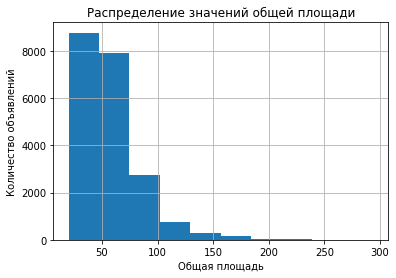

In [70]:
# общая площадь
data['total_area'].hist()
plt.title('Распределение значений общей площади')
plt.xlabel('Общая площадь') 
plt.ylabel('Количество объявлений')

Больше всего представлено квартир общей площадью примерно на диапозон 40-70 квадратных метров.

После 90 квадратных метров количество квартир с такой площадью сильно снижается.

Text(0, 0.5, 'Количество объявлений')

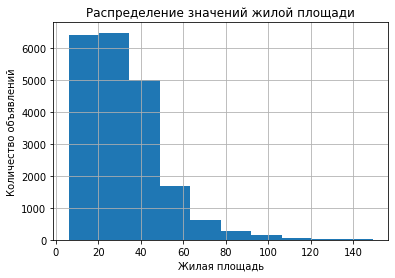

In [72]:
# жилая площадь
data['living_area'].hist()
plt.title('Распределение значений жилой площади')
plt.xlabel('Жилая площадь') 
plt.ylabel('Количество объявлений')

Что касается жилой площади, чаще всего значения в районе 18-30 квадратных метров, после 60 квадратных метров количество подобных квартир сильно уменьшается.

Распределение похоже на нормальное.

Text(0, 0.5, 'Количество объявлений')

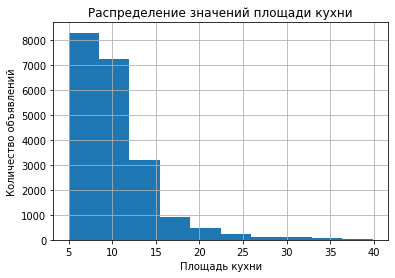

In [73]:
# площадь кухни
data['kitchen_area'].hist()
plt.title('Распределение значений площади кухни')
plt.xlabel('Площадь кухни') 
plt.ylabel('Количество объявлений')

Чаще всего площадь кухонь в районе 5-11 квадратных метров. Кухни с площадью более 20 квадртаных метров встречаются гораздо реже.

Text(0, 0.5, 'Количество объявлений')

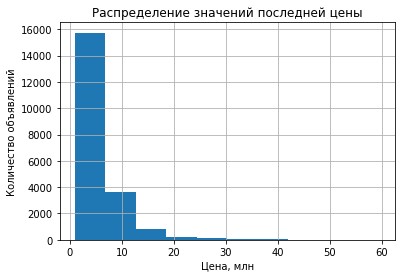

In [74]:
# цена объекта
data['last_price'].hist()
plt.title('Распределение значений последней цены')
plt.xlabel('Цена, млн') 
plt.ylabel('Количество объявлений')

За все время, за которое были собраны данные, чаще всего квартиры стоили меньше 12 миллионов. Квартиры стоимостью 16-17 миллионов встречаются уже гораздо реже, но встречаются и более дорогие варианты.

Text(0, 0.5, 'Количество объявлений')

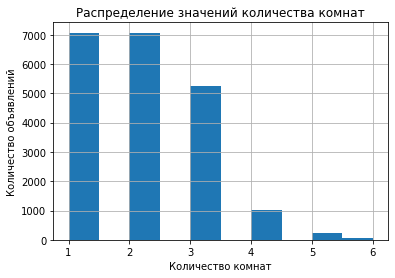

In [75]:
# количество комнат
data['rooms'].hist()
plt.title('Распределение значений количества комнат')
plt.xlabel('Количество комнат') 
plt.ylabel('Количество объявлений')

Чаще всего продаются квартиры с 1, 2 и 3 комнатами.

Text(0, 0.5, 'Количество объявлений')

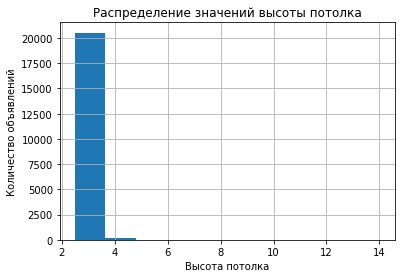

In [76]:
# высота потолков
data['ceiling_height'].hist()
plt.title('Распределение значений высоты потолка')
plt.xlabel('Высота потолка') 
plt.ylabel('Количество объявлений')

Расстояние потолка в основном больше чем 2 метра, но меньше, чем 3,5.

Text(0, 0.5, 'Количество объявлений')

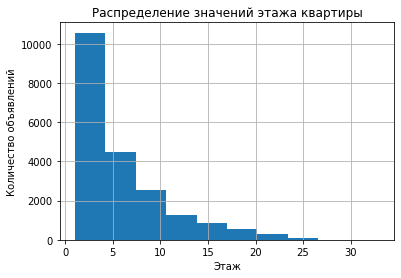

In [77]:
# этаж квартиры
data['floor'].hist()
plt.title('Распределение значений этажа квартиры')
plt.xlabel('Этаж') 
plt.ylabel('Количество объявлений')

Text(0, 0.5, 'Количество объявлений')

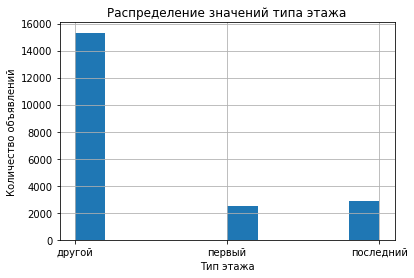

In [78]:
# тип этажа квартиры («первый», «последний», «другой»)
data['type_floor'].hist()
plt.title('Распределение значений типа этажа')
plt.xlabel('Тип этажа') 
plt.ylabel('Количество объявлений')

Очень много квартир, расположенных на первом этаже. Довольно большая часть квартир из категории "другой" также на низких этажах.

Text(0, 0.5, 'Количество объявлений')

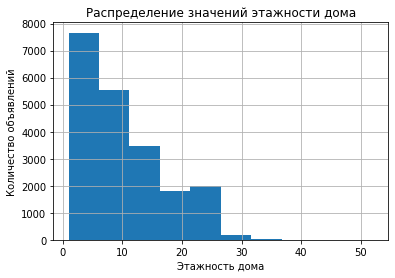

In [79]:
# общее количество этажей в доме;
data['floors_total'].hist()
plt.title('Распределение значений этажности дома')
plt.xlabel('Этажность дома') 
plt.ylabel('Количество объявлений')

Больше всего продаются квартир в зданиях с 9 этажами.

Text(0, 0.5, 'Количество объявлений')

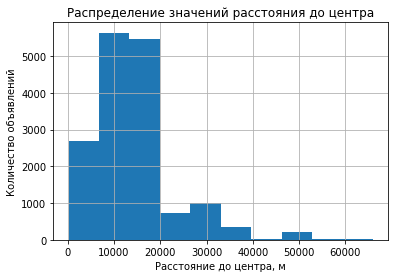

In [80]:
# расстояние до центра города в метрах;
data['cityCenters_nearest'].hist()
plt.title('Распределение значений расстояния до центра')
plt.xlabel('Расстояние до центра, м') 
plt.ylabel('Количество объявлений')

Больше всего квартир в 15-20 км от центра города. Есть пик значений в районе 50 км от центра.

Text(0, 0.5, 'Количество объявлений')

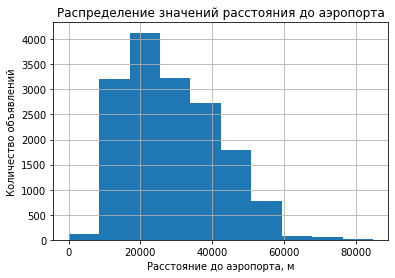

In [81]:
# расстояние до ближайшего аэропорта;
data['airports_nearest'].hist()
plt.title('Распределение значений расстояния до аэропорта')
plt.xlabel('Расстояние до аэропорта, м') 
plt.ylabel('Количество объявлений')

Довольно много квартир примерно в 20 км от аэропорта. Меньше всего продающихся квартир в 60-80 км. Также довольно мало квартир в непосредственной близости от аэропорта.

Text(0, 0.5, 'Количество объявлений')

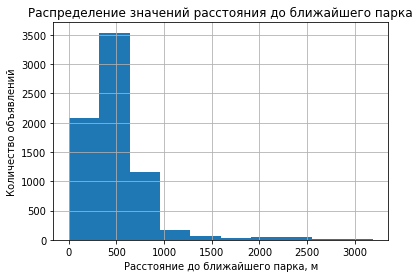

In [82]:
# расстояние до ближайшего парка;
data['parks_nearest'].hist()
plt.title('Распределение значений расстояния до ближайшего парка')
plt.xlabel('Расстояние до ближайшего парка, м') 
plt.ylabel('Количество объявлений')

Очень много квартир продаются недалеко от парков (до километра). Квартир, где парки находятся очень далеко (больше километра) гораздо меньше. Однако стоит держать в голове, что в этом столбце много пропусков, и результат может быть не так точен

Text(0, 0.5, 'Количество объявлений')

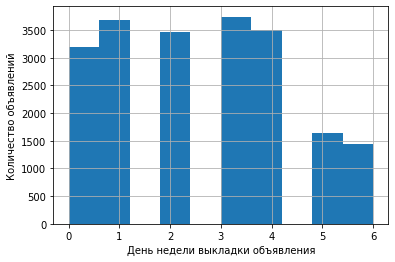

In [83]:
# день и месяц публикации объявления
data['weekday'].hist()
plt.xlabel('День недели выкладки объявления') 
plt.ylabel('Количество объявлений')

Нет особой закономерности в том, в какой день недели квартиры продаются чаще.

Text(0, 0.5, 'Количество объявлений')

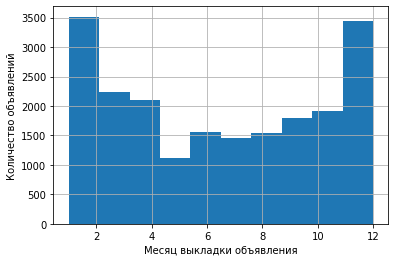

In [84]:
data['month'].hist()
plt.xlabel('Месяц выкладки объявления') 
plt.ylabel('Количество объявлений')

Чаще всего квартиры продаются в январе или в декабре. Это довольно необычно, но в остальные месяцы квартиры продаются сильно меньше.

**Вывод**


В основном в наших данных встречается нормальное распределение, то есть все значения довольно логичны.

Также довольно часто в данных встречается распределение Пуассона (например, цена, переменные, связанные с этажами в доме).

Вот примерное распределение самых частых значений у переменных:

- общая площадь чаще всего составляет 40-70 кв. м.
- жилая площадь чаще всего колеблется в районе 18-30 кв. м.
- Площадь кухни чаще всего составляет 5-11 кв. м.
- Цена чаще всего меньше 6 млн
- Чаще всего продаются квартиры с 1, 2 и 3 комнатами
- Высота потолков, как этого требует ГОСТ составляет 2-3 метра
- Довольно много квартир на 1 этаже и на начальных этажах, меньше всего - на последнем
- Квартиры в зданиях, где всего до 9 этажей, продаются чаще всего
- Много квартир в 15-20 км от центра города, этих значений болше всего
- Также много квартир в 20 км от аэропорта
- Чаще всего возле продающихся квартир рядом есть парк
- Нет закономерности в том, как день недели влияет на продажу
- Чаще всего квартиры продаются в январе и феврале



**Изучите, как быстро продавались квартиры:**

Text(0, 0.5, 'Количество объявлений')

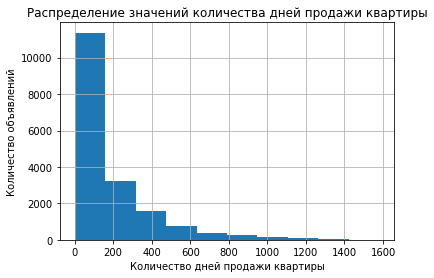

In [85]:
data['days_exposition'].hist()
plt.title('Распределение значений количества дней продажи квартиры')
plt.xlabel('Количество дней продажи квартиры') 
plt.ylabel('Количество объявлений')

In [86]:
data['days_exposition'].median()

100.0

In [87]:
data['days_exposition'].mean()

184.4786912751678

In [88]:
data['days_exposition'].describe()

count    17880.000000
mean       184.478691
std        221.509336
min          1.000000
25%         44.000000
50%        100.000000
75%        238.000000
max       1580.000000
Name: days_exposition, dtype: float64

Если сравнивать среднее и медиану, то среднее сильно выше. У нас очень много больших значений, что искажает среднее.

Чаще всего квартиры продавались в первые три месяца после выкладки объявления, но продажи могли сильно затянуться. Квартиры могли продаваться вплоть до нескольких лет.

В общем, можно ориентироваться на среднюю продложительность продажи в районе от 3 месяцев до полугода.

Что касается слишком долгих продаж - мы можем считать их таковыми, если квартира продается больше 7 месяцев. Слишком быстрые продажи можно считать все, что меньше полутора месяцев

**Какие факторы больше всего влияют на общую (полную) стоимость объекта?**

Постройте графики, которые покажут зависимость цены от указанных ниже параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы."
  - общей площади;
  - жилой площади;
  - площади кухни;
  - количество комнат;
  - типа этажа, на котором расположена квартира (первый, последний, другой);
  - даты размещения (день недели, месяц, год);

In [89]:
# Для начала соберем все необходимые для сравнения данные в один датафрейм
data_for_cor = data[['last_price', 'total_area', 'living_area', 'kitchen_area', 'rooms', 'type_floor', 'weekday', 'month', 'year']]

# Рассмотрим таблицу с корреляцией между разными переменными
data_for_cor.corr()


/tmp/ipykernel_236/59983383.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data_for_cor.corr()


,last_price,total_area,living_area,kitchen_area,rooms,weekday,month,year
last_price,1.000000,0.757751,0.651867,0.555925,0.467408,-0.019498,0.006390,-0.043220
total_area,0.757751,1.000000,0.922581,0.557393,0.784974,-0.017824,0.004741,-0.084669
living_area,0.651867,0.922581,1.000000,0.333855,0.878539,-0.013404,-0.002114,-0.072806
kitchen_area,0.555925,0.557393,0.333855,1.000000,0.194750,-0.014273,0.013399,-0.054155
rooms,0.467408,0.784974,0.878539,0.194750,1.000000,-0.005543,-0.001351,-0.052701
weekday,-0.019498,-0.017824,-0.013404,-0.014273,-0.005543,1.000000,0.012478,-0.002101
month,0.006390,0.004741,-0.002114,0.013399,-0.001351,0.012478,1.000000,-0.256790
year,-0.043220,-0.084669,-0.072806,-0.054155,-0.052701,-0.002101,-0.256790,1.000000


Text(0, 0.5, 'Общая площадь')

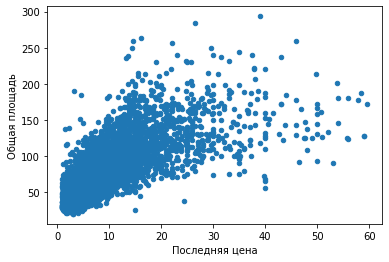

In [90]:
# теперь разберем каждую переменную по отдельности
data_for_cor.plot(x='last_price', y='total_area', kind='scatter') 
plt.xlabel('Последняя цена') 
plt.ylabel('Общая площадь')

Коэффициент корреляции Пирсона составляет 0,76

По графику также видно, что эти переменные связаны между собой. Можно сказать, что площадь квартиры значительно влияет на цену (что, в общем, логично)

Text(0, 0.5, 'Жилая площадь')

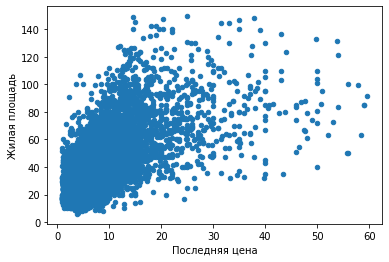

In [91]:
data_for_cor.plot(x='last_price', y='living_area', kind='scatter') 
plt.xlabel('Последняя цена') 
plt.ylabel('Жилая площадь')

Коэффициент корреляции Пирсона составляет 0,63 (чуть ниже, чем в случае с общей площадью). График тоже отражает эту связь, но она меньше чем в случае с общей площадью.

Text(0, 0.5, 'Площадь кухни')

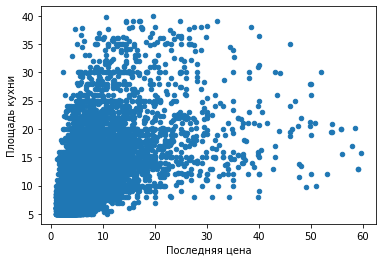

In [92]:
data_for_cor.plot(x='last_price', y='kitchen_area', kind='scatter') 
plt.xlabel('Последняя цена') 
plt.ylabel('Площадь кухни')

Коэффициент корреляции Пирсона 0,52
Площадь кухни не так сильно влияет на цену квартиры.

Text(0, 0.5, 'Средняя цена квартиры')

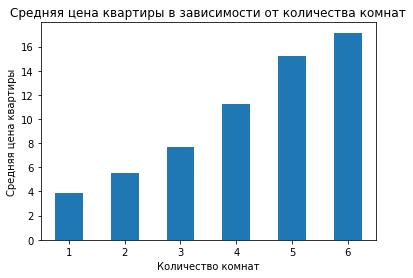

In [93]:
data_for_cor.groupby('rooms')['last_price'].mean().plot(kind='bar')

plt.xticks(rotation=0)
plt.title('Средняя цена квартиры в зависимости от количества комнат')
plt.xlabel('Количество комнат')
plt.ylabel('Средняя цена квартиры')

Коэффициент корреляции Пирсона 0,47

Это довольно странно, потому что по логике количество комнат должно влиять на цену. Но площадь квартиры, судя по этим данным, играет большую роль. 

На графике тяжелее оценить эту связь.

Text(0, 0.5, 'Средняя цена квартиры')

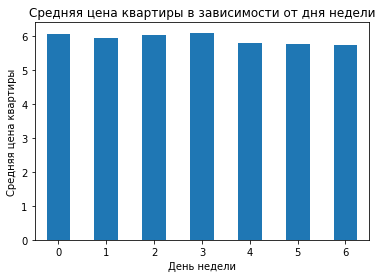

In [95]:
data_for_cor.groupby('weekday')['last_price'].mean().plot(kind='bar')

plt.xticks(rotation=0)
plt.title('Средняя цена квартиры в зависимости от дня недели')
plt.xlabel('День недели')
plt.ylabel('Средняя цена квартиры')

Text(0, 0.5, 'Средняя цена квартиры')

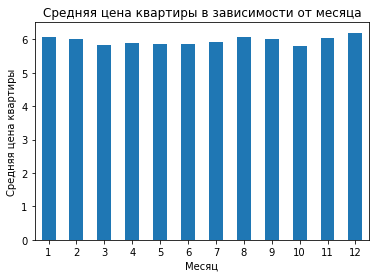

In [96]:
data_for_cor.groupby('month')['last_price'].mean().plot(kind='bar')

plt.xticks(rotation=0)
plt.title('Средняя цена квартиры в зависимости от месяца')
plt.xlabel('Месяц')
plt.ylabel('Средняя цена квартиры')

Text(0, 0.5, 'Средняя цена квартиры')

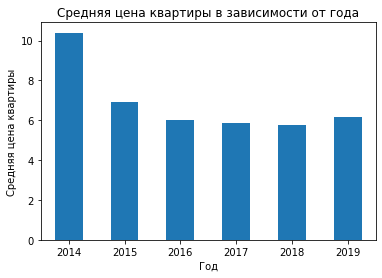

In [97]:
data_for_cor.groupby('year')['last_price'].mean().plot(kind='bar')

plt.xticks(rotation=0)
plt.title('Средняя цена квартиры в зависимости от года')
plt.xlabel('Год')
plt.ylabel('Средняя цена квартиры')

Text(0, 0.5, 'Средняя цена квартиры')

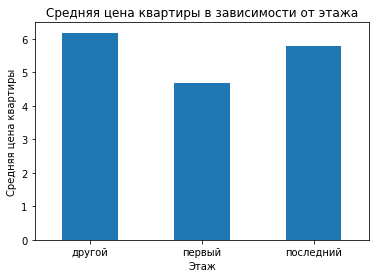

In [98]:
data_for_cor.groupby('type_floor')['last_price'].mean().plot(kind='bar')

plt.xticks(rotation=0)
plt.title('Средняя цена квартиры в зависимости от этажа')
plt.xlabel('Этаж')
plt.ylabel('Средняя цена квартиры')

У всех этих переменных коэффициент корреляции Пирсона около нуля. День недели, месяц или год никаким образом не влияет на цену квартиры.

**Вывод: что же влияет на цену квартиры?**

Больше всего на цену квартиры влияет ее общая площадь и жилая площадь. Цена в меньшей степени зависит от количества комнат, а день, месяц или год выкладки объявления не влияет на цену никаким образом.

**Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений.** 

Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце locality_name.

In [99]:
# Найдем 10 населенных пунктов с наибольшим числом объявлений и сохраним в новую переменную
loca10 = data['locality_name'].value_counts().head(10)

In [100]:
# Найдем среднюю цену за кв. м. в зависимости от населенного пункта
pivot = data.pivot_table(index = 'locality_name', values = 'price_per_metr', aggfunc = 'mean')

In [101]:
# Соберем все в одну таблицу и отсортируем ее
res = pivot.join(loca10)
res.columns = ['price', 'count']
res = res.query('count > 200')
res['price'] = res['price'] * 1000000
res.sort_values(by = 'price', ascending = False)

,price,count
locality_name,,
Санкт-Петербург,111592.754441,13878.0
Пушкин,102957.479118,325.0
Кудрово,95243.485241,386.0
Парголово,90726.536090,288.0
Мурино,85491.192347,475.0
Шушары,78399.356682,395.0
Колпино,75149.348401,320.0
Всеволожск,69102.517240,356.0
Гатчина,68997.838913,288.0


**Вывод**

Если мы рассматриваем 10 самых богатых на объявления населенные пункты, то можно сказать следующее:
- В Санкт-Петербурге самые дорогие квартиры и объявлений больше всего (что не удивительно)
- Дешевле всего квартиры в Выборге, затем идет Гатчина и Всеволожск

**Как влияет расстояние до центра в Санкт-Петербурге на цену:**


Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца locality_name и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города.

In [103]:
# сначала сохраним данные для Санкт-Петербурга и сохраним их в отдельную переменную
spb = data.query('locality_name == "Санкт-Петербург"').reset_index()
# округляем количество километров, чтобы мы могли легко сгруппировать цену по этому признаку
spb['km_center'] = round(spb['km_center'], 0)

In [104]:
# теперь посчитаем среднюю цену за квартиру в зависимости от близости к центру
pivot_spb = spb.pivot_table(index = 'km_center', values = 'last_price', aggfunc = 'mean')
pivot_spb

,last_price
km_center,
0.0,18.799033
1.0,12.011209
2.0,12.641857
3.0,9.778332
4.0,10.859110
5.0,11.181638
6.0,11.609254
7.0,11.425508
8.0,9.196378


Text(0.5, 1.0, 'Средняя цена квартиры в зависимости от расстояния до центра')

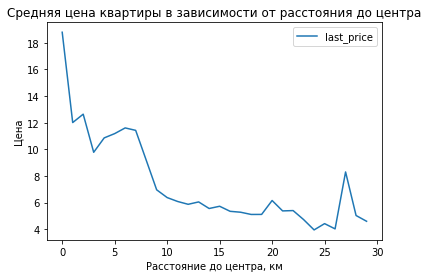

In [105]:
pivot_spb.plot()
plt.xlabel('Расстояние до центра, км') 
plt.ylabel('Цена')
plt.title('Средняя цена квартиры в зависимости от расстояния до центра')

**Вывод:**

Исходя из наших данных можно сказать, что чем ближе квартира находится к центру, тем в среднем дороже она стоит. Причем довольно дорого стоят и квартиры, которые находятся вплоть до 7 км от центра (там значения в основном составляют 10-11 млн)

### Общий вывод

Мною были изучены данные о покупке квартир, собранные с сервиса ЯндексНедвижимость в Санкт-Петербурге и прилегающих городах и поселках.

В данных содержались пропуски, ошибки и аномальные большие значения. Во время предобработки данных многие из них были заменены или удалены, но количество строк на это не сильно повлияло. Стоит обратить внимание на картографические данные - в них довольно часто были пропуски, которые нельзя заполнить. 

Также были проведены некоторые  изменения в самих данных, были рассчитаны некоторые показатели (например, цена за квадратный метр).

Вот примерное распределение самых частых значений у переменных:
- общая площадь чаще всего составляет 40-70 кв. м.
- жилая площадь чаще всего колеблется в районе 18-30 кв. м.
- Площадь кухни чаще всего составляет 5-11 кв. м.
- Цена чаще всего меньше 6 млн
- Чаще всего продаются квартиры с 1, 2 и 3 комнатами
- Высота потолков, как этого требует ГОСТ составляет 2-3 метра
- Довольно много квартир на 1 этаже и на начальных этажах, меньше всего - на последнем
- Квартиры в зданиях, где всего до 9 этажей, продаются чаще всего
- Много квартир в 15-20 км от центра города, этих значений болше всего
- Также много квартир в 20 км от аэропорта
- Чаще всего возле продающихся квартир рядом есть парк
- Нет закономерности в том, как день недели влияет на продажу
- Чаще всего квартиры продаются в январе и феврале

В основном, квартиры продавались в первые три месяца после выкладки объявления, но продажи могли сильно затянуться. 

В общем, можно ориентироваться на среднюю продложительность продажи в районе от 3 месяцев до полугода.

Больше всего на цену влияет общая и жилая площадь квартиры, количество комнат влияет на стоимость в меньшей степени.

Самые дорогие квартиры в Санкт-Петербурге. Причем, чем квартира ближе к центру (или если она находится на расстоянии до 7 км от центра), то стоимость увеличивается в среднем до 10-11 млн.

Все эти данные можно использовать для создания автоматизированной системы распознавания мошенников, но лучше изучить бОльшее количество данных для лучших результатов.